# Data Wrangling, Analyse and Visualization for WeRateDogs Dataset
## Gather

In [1]:
# import packages
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
# dataframe for basic information of tweets
df_enhanced = pd.read_csv('twitter-archive-enhanced.txt', sep=',')

In [3]:
# dataframe for Twitter API data 
df_json = pd.read_json('tweet_json.txt', lines=True)

In [4]:
# download image prediction data from web to local folder
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
r = requests.get(url)
with open(url.split('/')[-1], 'wb') as f:
    f.write(r.content)

In [5]:
# dataframe for images from local folder
df_image = pd.read_csv('image-predictions.tsv', sep='\t')

## Assess
### Visual assessment

In [6]:
df_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
df_enhanced.iloc[1]

tweet_id                                                     892177421306343426
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-08-01 00:17:27 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Tilly. She's just checking pup on you....
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/892177421...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

Visual assessment for df_enhanced:
- Some "rating_denominator"s are not 10.
- The values for "doggo", "floofer", "pupper", and "puppo" are not the Boolean type but showed as the column names themselves.

In [8]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Visual assessment for df_image:
- The values of "img_num" for some observations do not represent the images with the highest confidence. 

In [9]:
df_json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33786,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25445,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42863,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41016,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20548,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3240,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12053,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2142,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",66596,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,19548,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28187,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4403,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7684,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [10]:
df_json.iloc[1]

contributors                                                                   NaN
coordinates                                                                    NaN
created_at                                                     2017-08-01 00:17:27
display_text_range                                                        [0, 138]
entities                         {'hashtags': [], 'symbols': [], 'user_mentions...
extended_entities                {'media': [{'id': 892177413194625024, 'id_str'...
favorite_count                                                               33786
favorited                                                                    False
full_text                        This is Tilly. She's just checking pup on you....
geo                                                                            NaN
id                                                              892177421306343426
id_str                                                          892177421306343424
in_r

Visual assessment for df_json:
- There are too many unrelated columns collected.
- The column name of the tweet ID is different from that of df_enhanced and df_image.

### Programmatic assessment 

In [11]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
type(df_enhanced['timestamp'][0])

str

In [13]:
df_enhanced['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
df_enhanced['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
df_enhanced['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
df_enhanced['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [17]:
df_enhanced['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [18]:
df_enhanced['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
df_enhanced['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [20]:
df_enhanced[df_enhanced['retweeted_status_id'].isnull()]['tweet_id'].duplicated().sum()

0

Programmatic assessment for df_enhanced:
- There are observations whose "retweeted_status_id" are not NaN, so they are retweets.
- The data type of "tweet_id", "rating_numerator", and "rating_denominator" is int64 and that of "timestamp" is str.
- The columns "in_reply_to_status_id" and "in_reply_to_user_id" are useless. The columns "retweeted_status_id", "retweeted_status_user_id", and "retweeted_status_timestamp" are useless after the retweets are deleted.
- The "source" column is in a html formatting.
- Some values of "rating_numerator" are unusual (420, 666, 960, 1776, etc.).
- There are zeros in "rating_denominator".
- There are too much missing data for the "doggo", "floofer", "pupper", and "puppo" columns.

In [21]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
df_image['tweet_id'].duplicated().sum()

0

In [24]:
df_image['jpg_url'].duplicated().sum()

66

**There are duplicates for jpg_url, but no duplicates for tweet_id. As we merge the datasets on tweet_id, it does not matter for duplicated jpg_url.**

Programmatic assessment for df_image:
- There are 2356 observations in df_enhanced, but 2075 in df_image, so there are tweets in df_enhanced which do not have images.
- The data type of "tweet_id" is int64.
- The "img_num" of some observations is 4, while there is no data for the 4th image.

In [25]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null float64
id                               2352 non-null int64
id_str                           2352 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

Programmatic assessment for df_json:
- The data type of "id" is int64.

#### Quality
##### `df_enhanced`
- Some "rating_denominator"s are not 10.
- The values for "doggo", "floofer", "pupper", and "puppo" are not the Boolean type but showed as the column names themselves.
- There are observations whose "retweeted_status_id" are not NaN, so they are retweets.
- The data type of "tweet_id", "rating_numerator", and "rating_denominator" is int64 and that of "timestamp" is str.
- Some values of "rating_numerator" are unusual (420, 666, 960, 1776, etc.).
- There are zeros in "rating_denominator".
- There are too much missing data for the "doggo", "floofer", "pupper", and "puppo" columns.


##### `df_image`
- The values of "img_num" for some observations do not represent the images with the highest confidence.
- The data type of "tweet_id" is int64.
- The "img_num" of some observations is 4, while there is no data for the 4th image.
- There are 2356 observations in df_enhanced, but 2075 in df_image, so there are tweets in df_enhanced which do not have images.


##### `df_json`
- The data type of "id" is int64. 


#### Tidiness
- The column name of the tweet ID in df_json is different from that in df_enhanced and df_image.
- There are too many unrelated columns collected in df_json.
- The "source" column is in a html formatting.
- The columns "in_reply_to_status_id" and "in_reply_to_user_id" in df_enhanced are useless. The columns "retweeted_status_id", "retweeted_status_user_id", and "retweeted_status_timestamp" are useless after the retweets are deleted.
- The three datasets should be merged.


## Clean

In [26]:
# Copy three datasets
df_enhanced_copy = df_enhanced.copy()
df_image_copy = df_image.copy()
df_json_copy = df_json.copy()

#### Issue 1

##### Define
- Remove all columns for df_json_copy except "id", "favorite_count", and "retweet_count".
- Change the column name of "id" to "tweet_id".

##### Code

In [27]:
df_json_copy = df_json_copy[["id", "favorite_count", "retweet_count"]]
df_json_copy.rename(columns={'id':'tweet_id'},inplace=True)

##### Test

In [28]:
df_json_copy.head(1)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39492,8842


#### Issue 2

##### Define
- Delete retweets.

##### Code

In [29]:
# Remain tweets without the retweet ID
df_enhanced_copy = df_enhanced_copy[df_enhanced_copy['retweeted_status_id'].isna()]

##### Test

In [30]:
# There should not be the retweet ID in the remaining tweets
df_enhanced_copy['retweeted_status_id'].value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

#### Issue 3

##### Define
- Change the data type of "tweet_id" in three datasets to string.
- Change the data type of "timestamp" to pandas datetime.
- Change the data type of "rating_numerator" and "rating_denominator" to float.

##### Code

In [31]:
df_enhanced_copy['tweet_id'] = df_enhanced_copy['tweet_id'].astype(str)
df_image_copy['tweet_id'] = df_image_copy['tweet_id'].astype(str)
df_json_copy['tweet_id'] = df_json_copy['tweet_id'].astype(str)
df_enhanced_copy['timestamp'] = pd.to_datetime(df_enhanced_copy['timestamp'])
df_enhanced_copy['rating_numerator'] = df_enhanced_copy['rating_numerator'].astype(float)
df_enhanced_copy['rating_denominator'] = df_enhanced_copy['rating_denominator'].astype(float)

##### Test

In [32]:
df_enhanced_copy.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None


In [33]:
df_image_copy.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [34]:
df_json_copy.head(1)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39492,8842


In [35]:
print(type(df_enhanced_copy['tweet_id'][0]), 
      type(df_image_copy['tweet_id'][0]), 
      type(df_json_copy['tweet_id'][0]), 
      type(df_enhanced_copy['timestamp'][0]),
      type(df_enhanced_copy['rating_numerator'][0]), 
      type(df_enhanced_copy['rating_denominator'][0]))

<class 'str'> <class 'str'> <class 'str'> <class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'numpy.float64'> <class 'numpy.float64'>


#### Issue 4

##### Define
- Delete the html contents in "source".

##### Code

In [36]:
# Extract contents between ">" and "<".
df_enhanced_copy['source'] = df_enhanced_copy['source'].str.extract(r'>(.*)<',expand=True)

##### Test

In [37]:
df_enhanced_copy['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Issue 5

##### Define
- Delete the columns "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", and "retweeted_status_timestamp".

##### Code

In [38]:
df_enhanced_copy = df_enhanced_copy.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1)

##### Test

In [39]:
df_enhanced_copy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None


#### Issue 6

##### Define
- Gather information of the stage from "text".
- Reassign the stage to "doggo", "floofer", "pupper", "puppo" as Boolean type. 

##### Code

In [40]:
# Extract 'doggo' from 'text'
df_enhanced_copy['stage']=df_enhanced_copy['text'].str.lower().str.findall('doggo')

# Change the data type from list to string
df_enhanced_copy['stage'] = df_enhanced_copy['stage'].apply(''.join)

# Assign the value to the 'doggo' column as Boolean
df_enhanced_copy.loc[df_enhanced_copy['stage'] != '', 'doggo'] = 1

# Change the data type of missing value from string to Boolean
df_enhanced_copy['doggo'].replace("None", 0, inplace=True)

In [41]:
df_enhanced_copy['stage']=df_enhanced_copy['text'].str.lower().str.findall('floofer')
df_enhanced_copy['stage'] = df_enhanced_copy['stage'].apply(''.join)
df_enhanced_copy.loc[df_enhanced_copy['stage'] != '', 'floofer'] = 1
df_enhanced_copy['floofer'].replace("None", 0, inplace=True)

In [42]:
df_enhanced_copy['stage']=df_enhanced_copy['text'].str.lower().str.findall('pupper')
df_enhanced_copy['stage'] = df_enhanced_copy['stage'].apply(''.join)
df_enhanced_copy.loc[df_enhanced_copy['stage'] != '', 'pupper'] = 1
df_enhanced_copy['pupper'].replace("None", 0, inplace=True)

In [43]:
df_enhanced_copy['stage']=df_enhanced_copy['text'].str.lower().str.findall('puppo')
df_enhanced_copy['stage'] = df_enhanced_copy['stage'].apply(''.join)
df_enhanced_copy.loc[df_enhanced_copy['stage'] != '', 'puppo'] = 1
df_enhanced_copy['puppo'].replace("None", 0, inplace=True)

In [44]:
df_enhanced_copy = df_enhanced_copy.drop(['stage'], axis=1)

##### Test

In [45]:
df_enhanced_copy['doggo'].value_counts()

0    2080
1      95
Name: doggo, dtype: int64

In [46]:
df_enhanced_copy['floofer'].value_counts()

0    2165
1      10
Name: floofer, dtype: int64

In [47]:
df_enhanced_copy['pupper'].value_counts()

0    1915
1     260
Name: pupper, dtype: int64

In [48]:
df_enhanced_copy['puppo'].value_counts()

0    2142
1      33
Name: puppo, dtype: int64

In [49]:
df_enhanced_copy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,0,0,0,0


#### Issue 7

##### Define
- Check the unusual rating_denominator and rating_numerator, and update based on "text".

##### Code

In [50]:
df_enhanced_copy[df_enhanced_copy['rating_denominator'] != 10][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960.0,0.0
342,@docmisterio account started on 11/15/15,11.0,15.0
433,The floofs have been released I repeat the flo...,84.0,70.0
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24.0,7.0
902,Why does this never happen at my front door......,165.0,150.0
1068,"After so many requests, this is Bretagne. She ...",9.0,11.0
1120,Say hello to this unbelievably well behaved sq...,204.0,170.0
1165,Happy 4/20 from the squad! 13/10 for all https...,4.0,20.0
1202,This is Bluebert. He just saw that both #Final...,50.0,50.0
1228,Happy Saturday here's 9 puppers on a bench. 99...,99.0,90.0


In [51]:
df_enhanced_copy['text'][313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

**The grade should be 13/10.**

In [52]:
df_enhanced_copy['rating_numerator'][313] = 13
df_enhanced_copy['rating_denominator'][313] = 10

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
df_enhanced_copy['text'][342]

'@docmisterio account started on 11/15/15'

**This is an invalid observation, as 11/15/15 should be a date.**

In [54]:
df_enhanced_copy.drop([342], axis=0, inplace=True)

In [55]:
df_enhanced_copy['text'][433]

'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd'

In [56]:
df_enhanced_copy['text'][516]

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

**24/7 means 24 hours 7 days. There is no grade in this tweet. So it should be dropped.**

In [57]:
df_enhanced_copy.drop([516], axis=0, inplace=True)

In [58]:
df_enhanced_copy['text'][902]

'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE'

In [59]:
df_enhanced_copy['text'][1068]

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

**9/11 means the 9/11 event. The grade should be 14/10.**

In [60]:
df_enhanced_copy['rating_numerator'][1068] = 14
df_enhanced_copy['rating_denominator'][1068] = 10

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
df_enhanced_copy['text'][1120]

'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

In [62]:
df_enhanced_copy['text'][1165]

'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a'

**The grade should be 13/10.**

In [63]:
df_enhanced_copy['rating_numerator'][1165] = 13
df_enhanced_copy['rating_denominator'][1165] = 10

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [64]:
df_enhanced_copy['text'][1202]

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

**The grade should be 11/10.**

In [65]:
df_enhanced_copy['rating_numerator'][1202] = 11
df_enhanced_copy['rating_denominator'][1202] = 10

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [66]:
df_enhanced_copy['text'][1228]

"Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1"

In [67]:
df_enhanced_copy['text'][1254]

"Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12"

In [68]:
df_enhanced_copy['text'][1274]

'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK'

In [69]:
df_enhanced_copy['text'][1351]

"Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa"

In [70]:
df_enhanced_copy['text'][1433]

"Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ"

In [71]:
df_enhanced_copy['text'][1598]

"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating"

In [72]:
df_enhanced_copy['text'][1634]

'Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3'

In [73]:
df_enhanced_copy['text'][1635]

'Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55'

In [74]:
df_enhanced_copy['text'][1662]

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'

**7/11 means the convenience store. The grade should be 10/10.**

In [75]:
df_enhanced_copy['rating_numerator'][1662] = 10
df_enhanced_copy['rating_denominator'][1662] = 10

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [76]:
df_enhanced_copy['text'][1663]

"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible"

In [77]:
df_enhanced_copy['text'][1779]

"IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq"

In [78]:
df_enhanced_copy['text'][1843]

'Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw'

In [79]:
df_enhanced_copy['text'][2335]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

**The grade should be 9/10.**

In [80]:
df_enhanced_copy['rating_numerator'][2335] = 9
df_enhanced_copy['rating_denominator'][2335] = 10

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
df_enhanced_copy[df_enhanced_copy['rating_numerator'] > 20][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10...,420.0,10.0
189,@s8n You tried very hard to portray this good ...,666.0,10.0
290,@markhoppus 182/10,182.0,10.0
433,The floofs have been released I repeat the flo...,84.0,70.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0,10.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0,10.0
902,Why does this never happen at my front door......,165.0,150.0
979,This is Atticus. He's quite simply America af....,1776.0,10.0
1120,Say hello to this unbelievably well behaved sq...,204.0,170.0
1228,Happy Saturday here's 9 puppers on a bench. 99...,99.0,90.0


In [82]:
df_enhanced_copy['text'][188]

'@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research'

In [83]:
df_enhanced_copy['text'][189]

'@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10'

In [84]:
df_enhanced_copy['text'][290]

'@markhoppus 182/10'

In [85]:
df_enhanced_copy['text'][695]

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

**The grade should be 9.75/10.**

In [86]:
df_enhanced_copy['rating_numerator'][695] = 9.75
df_enhanced_copy['rating_denominator'][695] = 10

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [87]:
df_enhanced_copy['text'][763]

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

**The grade should be 11.27/10.**

In [88]:
df_enhanced_copy['rating_numerator'][763] = 11.27
df_enhanced_copy['rating_denominator'][763] = 10

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [89]:
df_enhanced_copy['text'][979]

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [90]:
df_enhanced_copy['text'][1712]

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

**The grade should be 11.26/10.**

In [91]:
df_enhanced_copy['rating_numerator'][1712] = 11.26
df_enhanced_copy['rating_denominator'][1712] = 10

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:
df_enhanced_copy['text'][2074]

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

##### Test

In [93]:
df_enhanced_copy[df_enhanced_copy['rating_denominator'] != 10][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,84.0,70.0
902,Why does this never happen at my front door......,165.0,150.0
1120,Say hello to this unbelievably well behaved sq...,204.0,170.0
1228,Happy Saturday here's 9 puppers on a bench. 99...,99.0,90.0
1254,Here's a brigade of puppers. All look very pre...,80.0,80.0
1274,"From left to right:\nCletus, Jerome, Alejandro...",45.0,50.0
1351,Here is a whole flock of puppers. 60/50 I'll ...,60.0,50.0
1433,Happy Wednesday here's a bucket of pups. 44/40...,44.0,40.0
1598,Yes I do realize a rating of 4/20 would've bee...,4.0,20.0
1634,"Two sneaky puppers were not initially seen, mo...",143.0,130.0


In [94]:
df_enhanced_copy[df_enhanced_copy['rating_numerator'] > 20][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10...,420.0,10.0
189,@s8n You tried very hard to portray this good ...,666.0,10.0
290,@markhoppus 182/10,182.0,10.0
433,The floofs have been released I repeat the flo...,84.0,70.0
902,Why does this never happen at my front door......,165.0,150.0
979,This is Atticus. He's quite simply America af....,1776.0,10.0
1120,Say hello to this unbelievably well behaved sq...,204.0,170.0
1228,Happy Saturday here's 9 puppers on a bench. 99...,99.0,90.0
1254,Here's a brigade of puppers. All look very pre...,80.0,80.0
1274,"From left to right:\nCletus, Jerome, Alejandro...",45.0,50.0


#### Issue 8

##### Define
- Create a column in df_image_copy for the dog type based on confidence columns and "is dog" columns.
- Delete useless columns.

##### Code

In [95]:
# Create a formula to extract the dog type
def dog_type(dataframe):
    if dataframe['p1_dog'] == True:
        return dataframe['p1']
    elif dataframe['p2_dog'] == True:
        return dataframe['p2']
    elif dataframe['p3_dog'] == True:
        return dataframe['p3']
    return None

In [96]:
df_image_copy['dog_type'] = df_image_copy.apply(dog_type, axis=1)

In [97]:
# Test before deleting useless columns
df_image_copy.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None


In [98]:
df_image_copy = df_image_copy.drop(['img_num','p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

##### Test

In [99]:
df_image_copy.head()

,tweet_id,jpg_url,dog_type
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


#### Issue 9

##### Define
- Merge 3 datasets. The df_enhanced_copy and df_image_copy should be merged by inner to remove tweets without images.

##### Code

In [100]:
# Merge df_image_copy to df_enhanced_copy by 'inner', because only tweets with images are needed.
df_clean = df_enhanced_copy.merge(df_image_copy, how='inner', on='tweet_id')

# Merge df_json_copy into dataset
df_clean = df_clean.merge(df_json_copy, how='left', on='tweet_id')

##### Test

In [101]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,dog_type,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,0,0,0,0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,39492,8842
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,0,0,0,0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,33786,6480
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,0,0,0,0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,25445,4301
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,0,0,0,0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,42863,8925
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,0,0,0,0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,41016,9721


In [102]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 16 columns):
tweet_id              1993 non-null object
timestamp             1993 non-null datetime64[ns]
source                1993 non-null object
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null float64
name                  1993 non-null object
doggo                 1993 non-null int64
floofer               1993 non-null int64
pupper                1993 non-null int64
puppo                 1993 non-null int64
jpg_url               1993 non-null object
dog_type              1685 non-null object
favorite_count        1993 non-null int64
retweet_count         1993 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(7)
memory usage: 264.7+ KB


### Store

In [103]:
# Save the clean main dataset as a csv file
df_clean.to_csv('twitter_archive_master.csv')

## Analyze and Visualize

In [104]:
# Create a copy of the clean data
df = df_clean.copy()

In [105]:
# Define the grade
df['grade'] = df['rating_numerator']/df['rating_denominator']

# Define the text length of the tweet
df['text_len'] = df['text'].str.len()

In [106]:
df.describe()

,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,favorite_count,retweet_count,grade,text_len
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.00000,1993.000000
mean,12.219910,10.511791,0.040140,0.004014,0.118916,0.014551,8924.648269,2770.584546,1.16459,122.260411
std,41.471162,7.262919,0.196338,0.063245,0.323771,0.119776,12403.166372,4717.077759,4.06493,26.033052
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,81.000000,15.000000,0.00000,36.000000
25%,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1969.000000,621.000000,1.00000,105.000000
50%,11.000000,10.000000,0.000000,0.000000,0.000000,0.000000,4114.000000,1348.000000,1.10000,132.000000
75%,12.000000,10.000000,0.000000,0.000000,0.000000,0.000000,11278.000000,3203.000000,1.20000,139.000000
max,1776.000000,170.000000,1.000000,1.000000,1.000000,1.000000,132318.000000,79116.000000,177.60000,167.000000


**Note that there is no tweet for the source vine.**

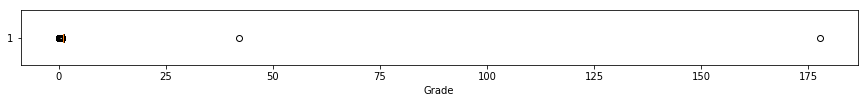

In [107]:
# Bloxplot for the grade
plt.subplots(figsize=(15,1))
plt.boxplot(df['grade'], vert=False)
plt.xlabel('Grade');

**The distribution of grade centralizes between 0 and 2.**

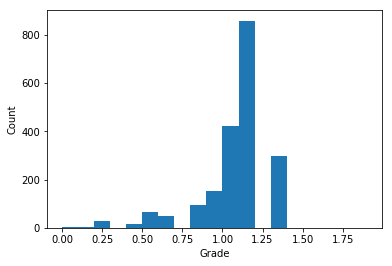

In [108]:
# Histogram for the grades smaller than 2
plt.hist(df['grade'], bins=np.arange(0, 2, 0.1))
plt.xlabel('Grade')
plt.ylabel('Count');

**Zoom in the chart, it can be seen people tend to give a grade between 1.0 and 1.2.**

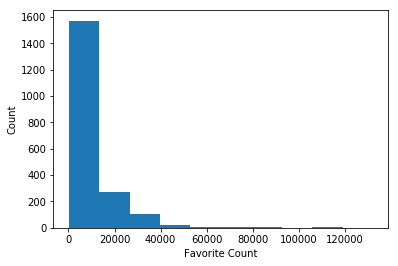

In [109]:
# Histogram for favorite_count
plt.hist(df['favorite_count'])
plt.xlabel('Favorite Count')
plt.ylabel('Count');

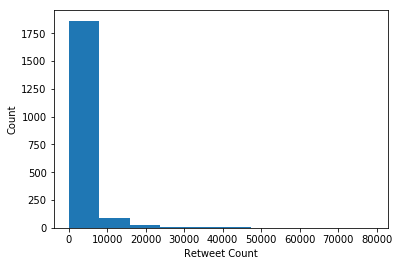

In [110]:
# Histogram for retweet_count
plt.hist(df['retweet_count'])
plt.xlabel('Retweet Count')
plt.ylabel('Count');

**The distributions of favorite_count and retweet_count are right-skewed.**

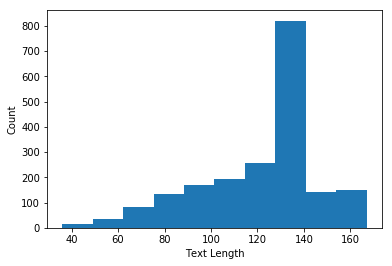

In [111]:
# Histogram for text lengths
plt.hist(df['text_len'])
plt.xlabel('Text Length')
plt.ylabel('Count');

**The distribution of the text length is left-skewed. People tent to write a tweet with the length with 130 to 140.**

In [112]:
# Create a table for the dog stage
df_stage = pd.DataFrame({'stage': ['doggo', 'floofer', 'pupper', 'puppo'],
                         'count':[df['doggo'].sum(), df['floofer'].sum(),
                                  df['pupper'].sum(), df['puppo'].sum()]})

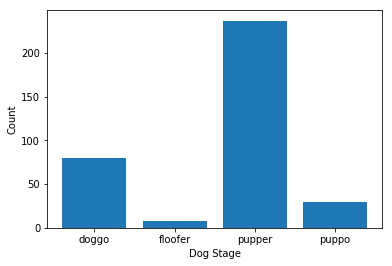

In [113]:
# Bar chart for the dog stage
plt.bar(df_stage['stage'], df_stage['count'])
plt.xlabel('Dog Stage')
plt.ylabel('Count');

**Pupper is a stage that is mentioned the most.**

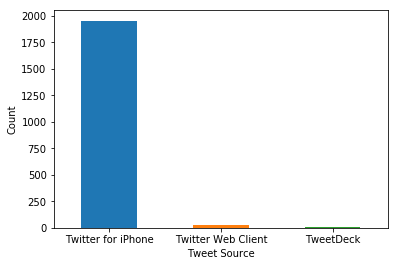

In [114]:
# Bar chart for tweet sources
df['source'].value_counts().plot(kind='bar')
plt.xlabel('Tweet Source')
plt.ylabel('Count')
plt.xticks(rotation='horizontal');

**People mostly use iPhone to tweet.**

In [115]:
# Calculate the correlation coefficient
print(np.corrcoef(df['text_len'], df['retweet_count']))
print(np.corrcoef(df['text_len'], df['favorite_count']))
print(np.corrcoef(df['grade'], df['retweet_count']))
print(np.corrcoef(df['grade'], df['favorite_count']))

[[1.         0.04818415]
 [0.04818415 1.        ]]
[[1.         0.14616841]
 [0.14616841 1.        ]]
[[1.         0.02342507]
 [0.02342507 1.        ]]
[[1.         0.02247286]
 [0.02247286 1.        ]]


**The correlations between independent variables (text_len and grade) and dependent variables (favorite_count and retweet_count) are weak with correlation coefficients lower than 0.3.**

In [116]:
# Calculate the correlation coefficient for favorite_count and retweet_count
np.corrcoef(df['favorite_count'], df['retweet_count'])

array([[1.        , 0.91501956],
       [0.91501956, 1.        ]])

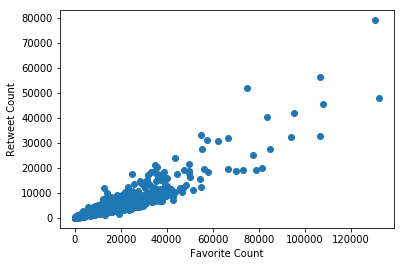

In [117]:
# Scatter plot for favorite_count and retweet_count
plt.scatter(df['favorite_count'], df['retweet_count'])
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count');

#### Conclusion 1

The favorite_count and retweet_count have a strong correlation. The correlation coefficient is 0.91501956 and the scatter points concentrate in a straight line. It means the tweets which are given the 'favorate' are likely to be retweeted.

In [118]:
# The favorite_count grouped by kinds of dogs in a descending order
df.groupby('dog_type', as_index= False)['favorite_count'].sum().sort_values('favorite_count', ascending=False)

,dog_type,favorite_count
89,golden_retriever,1950826
37,Labrador_retriever,1269771
49,Pembroke,1036321
16,Chihuahua,756715
55,Samoyed,582082
23,French_bulldog,568978
81,chow,456699
83,cocker_spaniel,413968
101,pug,382463
95,malamute,350710


In [119]:
# The retweet_count grouped by kinds of dogs in a descending order
df.groupby('dog_type', as_index= False)['retweet_count'].sum().sort_values('retweet_count', ascending=False)

,dog_type,retweet_count
89,golden_retriever,588494
37,Labrador_retriever,405312
49,Pembroke,290602
16,Chihuahua,253916
55,Samoyed,202313
23,French_bulldog,155290
83,cocker_spaniel,147681
81,chow,133512
101,pug,118051
108,toy_poodle,115125


#### Conclusion 2

The 6 favorite kinds of dogs by both favorite_count and retweet_count are golden_retriever, Labrador_retriever, Pembroke, Chihuahua, Samoyed, and French_bulldog.

In [120]:
df['intercept'] = 1

In [121]:
# Creat dummy variables for source
df[['tweetdeck', 'web', 'iphone']] = pd.get_dummies(df['source'])

In [122]:
# Create OLS linear regression model for retweet_count
# For sources, there are no tweets via vine, so 2 variables are incorporated into the model
lm_1 = sm.OLS(df['retweet_count'], df[['intercept', 'grade', 'text_len',
                                         'doggo', 'floofer', 'pupper',
                                         'web', 'iphone']])
result_1 = lm_1.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     8.865
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           8.78e-11
Time:                        21:56:32   Log-Likelihood:                -19655.
No. Observations:                1993   AIC:                         3.933e+04
Df Residuals:                    1985   BIC:                         3.937e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    751.2118   1572.448      0.478      0.633   -2332.611    3835.034
grade         34.2785     26.870      1.276      0.202     -18.417      86.974
text_len       7.3421      4.025      1.824      0.068      -0.551      15.235
doggo       3855.6173    531.834      7.250      0.000    2812.606    4898.629
floofer     1488.8687   1650.511      0.902      0.367   -1748.048    4725.785
pupper      -427.1951    322.699     -1.324      0.186   -1060.058     205.668
web          746.2836   1711.990      0.436      0.663   -2611.203    4103.770
iphone       980.5691   1472.536      0.666      0.506   -1907.309    3868.447
==============================================================================
Omnibus:                     2397.534   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           324835.702
Skew:                           6.242   Prob(JB):                         0.00
Kurtosis:                      64.285   Cond. No.                     3.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The P values for grade, floofer, and all sources are over 10%. It might be not good to incorporate these variables into the model. Try to remove them and the model fits better.**

In [123]:
lm_11 = sm.OLS(df['retweet_count'], df[['intercept', 'text_len', 'doggo']])
result_11 = lm_11.fit()
result_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     28.82
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           4.60e-13
Time:                        21:56:32   Log-Likelihood:                -19658.
No. Observations:                1993   AIC:                         3.932e+04
Df Residuals:                    1990   BIC:                         3.934e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1709.0835    500.533      3.415      0.001     727.461    2690.707
text_len       7.4134      4.008      1.849      0.065      -0.448      15.274
doggo       3864.7821    531.480      7.272      0.000    2822.467    4907.098
==============================================================================
Omnibus:                     2397.006   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           324221.524
Skew:                           6.240   Prob(JB):                         0.00
Kurtosis:                      64.225   Cond. No.                         637.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion 3

The tweets with longer text lengths and mentioning "doggo" are more likely to be retweeted.

In [124]:
# Create OLS linear regression model for favorite_count
lm_2 = sm.OLS(df['favorite_count'], df[['intercept', 'grade', 'text_len',
                                         'doggo', 'floofer', 'pupper',
                                         'web', 'iphone']])
result_2 = lm_2.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     13.91
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           1.06e-17
Time:                        21:56:32   Log-Likelihood:                -21565.
No. Observations:                1993   AIC:                         4.315e+04
Df Residuals:                    1985   BIC:                         4.319e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -5451.6491   4099.402     -1.330      0.184   -1.35e+04    2587.934
grade        119.4870     70.050      1.706      0.088     -17.891     256.865
text_len      66.8483     10.493      6.371      0.000      46.271      87.426
doggo       9017.8414   1386.501      6.504      0.000    6298.691    1.17e+04
floofer     2740.9414   4302.914      0.637      0.524   -5697.761    1.12e+04
pupper     -1653.5218    841.281     -1.965      0.049   -3303.408      -3.635
web         2537.6893   4463.190      0.569      0.570   -6215.340    1.13e+04
iphone      5969.0441   3838.929      1.555      0.120   -1559.708    1.35e+04
==============================================================================
Omnibus:                     1645.097   Durbin-Watson:                   1.245
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47219.947
Skew:                           3.758   Prob(JB):                         0.00
Kurtosis:                      25.630   Cond. No.                     3.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The P values for floofer, and all sources are over 10%. It might be not good to incorporate these variables into the model. Try to remove them and the model fits better.**

In [125]:
lm_22 = sm.OLS(df['favorite_count'], df[['intercept', 'grade', 'text_len',
                                         'doggo', 'pupper']])
result_22 = lm_22.fit()
result_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     23.07
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           1.17e-18
Time:                        21:56:32   Log-Likelihood:                -21568.
No. Observations:                1993   AIC:                         4.315e+04
Df Residuals:                    1988   BIC:                         4.317e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    563.7838   1324.119      0.426      0.670   -2033.022    3160.590
grade         87.8433     66.984      1.311      0.190     -43.522     219.209
text_len      66.1722     10.484      6.312      0.000      45.612      86.733
doggo       9008.7419   1386.485      6.498      0.000    6289.626    1.17e+04
pupper     -1625.4863    841.146     -1.932      0.053   -3275.106      24.133
==============================================================================
Omnibus:                     1643.454   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47023.880
Skew:                           3.754   Prob(JB):                         0.00
Kurtosis:                      25.581   Cond. No.                         638.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion 4

The tweets with longer text lengths and mentioning "doggo" are more likely to be given a "favorite". It seems people do not like a tweet mentioning "pupper". The grade in the tweet does not contribute significantly for the "favorite".

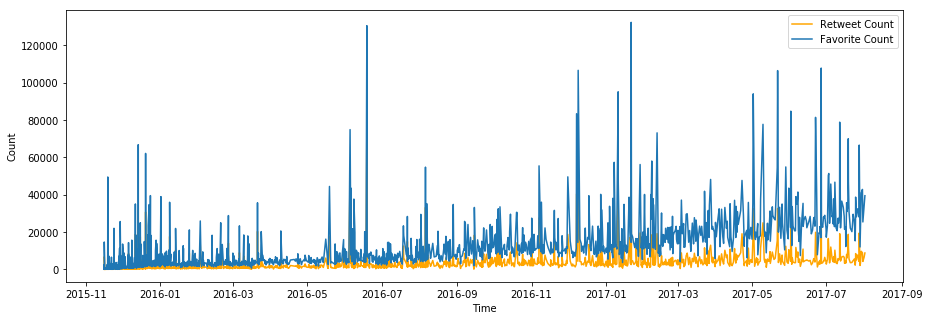

In [126]:
plt.subplots(figsize=(15,5))
plt.plot(df['timestamp'], df['retweet_count'], color='orange', label='Retweet Count')
plt.plot(df['timestamp'], df['favorite_count'], label='Favorite Count')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend();

#### Visualization

This is a line chart for the retweet count and the favorite count over time.

From the chart it can be seen both counts go up over time. The retweet count increases steadily, and the range of increase is lower than the favorite count. The favorite count rises greatly with wild fluctuations.

It is supposed the large fluctuations appear when there are tweets that appeal to people. By contrast, people prefer giving a 'favorate' to retweeting.